# Python protobuf test

In [14]:
from software.proto.repeated_any_msg_pb2 import RepeatedAnyMsg
from software.proto.sensor_msg_pb2 import SensorProto
from software.proto import sensor_msg_pb2
from google.protobuf.any_pb2 import Any
from google.protobuf.internal.decoder import _DecodeVarint32
import numpy as np
import matplotlib.pyplot as plt
import os
from python_tools.proto_log import ProtoLog

In [15]:
buf = open('/home/jordan/protologgertest/SensorProto/8', 'rb').read()
msg_len, new_pos = _DecodeVarint32(buf, 0)
msg_data = buf[new_pos:new_pos + msg_len]
replaymsg = RepeatedAnyMsg()
replaymsg.ParseFromString(msg_data)

sensormsgs = []
for anymsg in replaymsg.messages:
    sensormsg = SensorProto()
    anymsg.Unpack(sensormsg)
    sensormsgs.append(sensormsg)

In [16]:
ssl_detections = []
for sensormsg in sensormsgs:
    if sensormsg.HasField("ssl_vision_msg") and sensormsg.ssl_vision_msg.HasField("detection"):
        ssl_detections.append(sensormsg.ssl_vision_msg.detection)

In [17]:
ball_detections = []

for detection in ssl_detections: 
    ball_detections.extend(detection.balls)
    

ball_xs = [ball.x for ball in ball_detections]
ball_ys = [ball.y for ball in ball_detections]

Text(0.5, 1.0, 'Ball positions')

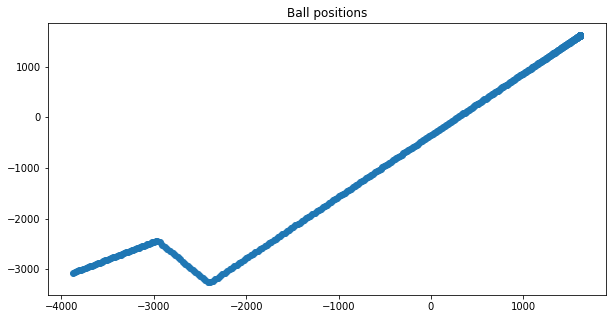

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(ball_xs, ball_ys)
plt.title("Ball positions")

In [66]:
proto_log = ProtoLog('/home/jordan/protologgertest/SensorProto/', SensorProto)
sensor_msg = proto_log[50]
fields = list(sensor_msg._fields)
sensor_msg.ListFields()[0][0].name

Loaded 11 RepeatedAnyMsg chunks
idx 50 -> chunk_idx=0, msg_idx=50


'ssl_vision_msg'

In [68]:
class SensorProtoLog:
    def __init__(self, directory):
        proto_log = ProtoLog(directory, SensorProto)
        first_sensor_msg = proto_log[0]
        field_names = [field[0].name for field in first_sensor_msg.ListFields()]
        print(field_names)

In [69]:
SensorProtoLog('/home/jordan/protologgertest/SensorProto/')

Loaded 11 RepeatedAnyMsg chunks
idx 0 -> chunk_idx=0, msg_idx=0
['ssl_vision_msg', 'backend_received_time']
